In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Loading the data
input_file = 'laptop_details.csv'
df = pd.read_csv(input_file)
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
# Extracting the features
operating_system = []
storage = []
processor = []
display = []
ram_type = []
waranty = []
ssd = []
ram = []
generation = []

for line in df['Feature']:
    os_info = re.search(r'd{2}\sbit\sWindows\s\d{2}|Mac\sOS|DOS|(Windows\s[\d+])\sOperating|(Windows\s\d+)\sOperating', line)
    operating_system.append(os_info.group(0) if os_info else np.nan)
    
    process_info = re.search(r'[iI]ntel\sCore\s[iI]?\d|\w+\sDual Core|\w+\s[0-9]\sHexa\sCore|[0-9] Octal Core|\w+\s[0-9]\sQuad Core|Core i[0-9]\s|M[0-9]\sProcessor|Processor:\s(Intel\si3)|(\w+\s[\d+]\sOcta\sCore)\sProcessor',line)
    processor.append(process_info.group() if process_info else np.nan)
    
    inches_info = re.search(r'(\d+\.\d+) inch|(\d+) inch|(\d+) Inch|(\d+\.\d+) inch', line)
    display.append(inches_info.group() if inches_info else np.nan)

    waranty_info = re.search(r'(\d\sYear[s]?|\d\sYEAR[S]?|[a-zA-Z]\sYEAR[S]?)', line)
    waranty.append(waranty_info.group(1) if waranty_info else np.nan)
    
    ram_info = re.search(r'(\d+\sGB) DDR\d+ RAM|(\d+\sTB) DDR\d+ RAM|(\d+ GB) LPDDR\d+ RAM|(\d+ GB) LPDDR4 RAM|(\d+ GB) LPDDR4X RAM',line)
    ram.append(ram_info.group() if ram_info else np.nan)
    
    gen_info = re.search(r'(\d+th)\sGen',line)
    generation.append(gen_info.group() if gen_info else np.nan)

for line in df['Product']:
    ssd_info = re.search(r'\d+ GB\sSSD|\d+ TB\sSSD|\d+ GB EMMC|\d+ TB HDD|\d+ GB SSD',line)
    ssd.append(ssd_info.group() if ssd_info else np.nan)


df['Brand'] = df['Product'].str.split(' ',1).str[0]
df['Operating_system'] = operating_system
df['Processor'] = processor
df['Display_Inches'] = display
df['RAM'] = ram
# df['RAM_type'] = ram_type
df['Storage'] = ssd
df['Generation'] = generation
df['Waranty'] = waranty

# df['Storage'] = df['Storage'].str.replace(r'\s+\w+$', '', regex=True)

df['RAM_type'] = df['RAM'].str.replace('RAM','').str.strip().str.split().str[-1]

In [4]:
df.head()

,Product,Rating,MRP,Feature,Brand,Operating_system,Processor,Display_Inches,RAM,Storage,Generation,Waranty,RAM_type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11 Operating,Intel Core i3,14 inch,8 GB DDR4 RAM,256 GB SSD,11th Gen,2 Year,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11 Operating,Intel Core i3,15.6 inch,8 GB DDR4 RAM,512 GB SSD,11th Gen,2 Year,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11 Operating,Intel Core i3,15.6 inch,8 GB DDR4 RAM,512 GB SSD,10th Gen,1 Year,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10 Operating,Ryzen 5 Hexa Core,15.6 inch,8 GB DDR4 RAM,512 GB SSD,NaN,1 Year,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11 Operating,Intel Core i5,15.6 inch,8 GB DDR4 RAM,512 GB SSD,10th Gen,1 Year,DDR4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    object 
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Operating_system  713 non-null    object 
 6   Processor         703 non-null    object 
 7   Display_Inches    718 non-null    object 
 8   RAM               708 non-null    object 
 9   Storage           720 non-null    object 
 10  Generation        370 non-null    object 
 11  Waranty           715 non-null    object 
 12  RAM_type          708 non-null    object 
dtypes: float64(1), object(12)
memory usage: 73.2+ KB


## Data Cleaning

In [6]:
# Operating_system column
null_operating_system = df['Operating_system'].isnull()
rows_with_null_operating_system = df.loc[null_operating_system]
rows_with_null_operating_system

row_indices_to_fill = [89, 96, 345, 509, 632, 695, 715]
value_to_fill = "Windows 11"
for row_index in row_indices_to_fill:
    df.at[row_index, 'Operating_system'] = value_to_fill

In [7]:
# Processor column
null_operating_system = df['Processor'].isnull()
rows_with_null_operating_system = df.loc[null_operating_system]
print(rows_with_null_operating_system) 

row_indices_to_fill = [72,183,519]
value_to_fill = "Intel Celeron Quad Core"
for row_index in row_indices_to_fill:
    df.at[row_index, 'Processor'] = value_to_fill
    
row_indices_to_fill1 = [79,153,168,209,305,325]
value_to_fill = "M1 Pro"
for row_index in row_indices_to_fill1:
    df.at[row_index, 'Processor'] = value_to_fill
    
row_indices_to_fill2 = [235,389]
value_to_fill = "Intel Platinum Silver"
for row_index in row_indices_to_fill2:
    df.at[row_index, 'Processor'] = value_to_fill
    
row_indices_to_fill3 = [402,569,576]
value_to_fill = "Intel Platinum Quad Core"
for row_index in row_indices_to_fill3:
    df.at[row_index, 'Processor'] = value_to_fill
    
row_indices_to_fill4 = [83]
value_to_fill = "Qualcomm Snapdragon 7c"
for row_index in row_indices_to_fill4:
    df.at[row_index, 'Processor'] = value_to_fill
    
row_indices_to_fill5 = [94]
value_to_fill = "Intel PQC-N5030"
for row_index in row_indices_to_fill5:
    df.at[row_index, 'Processor'] = value_to_fill
    
row_indices_to_fill6 = [162]
value_to_fill = "M1 Max"
for row_index in row_indices_to_fill6:
    df.at[row_index, 'Processor'] = value_to_fill

In [8]:
# Display_inches column
row_indices_to_fill = [142,349]
value_to_fill = "15.6"
for row_index in row_indices_to_fill:
    df.at[row_index, 'Display_Inches'] = value_to_fill 
    
df['Display_Inches'] = df['Display_Inches'].str.replace('inch', '').str.replace('Inch','')

In [9]:
# Waranty
null_waranty = df['Waranty'].isnull()
rows_with_null_waranty = df.loc[null_waranty]
print(rows_with_null_waranty)

row_indices_to_fill1 = [136,373,498,598]
value_to_fill = '1 year'
for row_index in row_indices_to_fill1:
    df.at[row_index, 'Waranty'] = value_to_fill

df.at[392, 'Waranty'] = '2 years'

In [10]:
# RAM type
row_indices_to_fill = [64,79,85,153,162,168,209,233,282,297,305,325]
value_to_fill = "Unified Memory"
for row_index in row_indices_to_fill: 
    df.at[row_index, 'RAM_type'] = value_to_fill

In [11]:
# RAM
row_indices_to_fill = [64,85,233,282,297]
value_to_fill = "8 GB"
for row_index in row_indices_to_fill: 
    df.at[row_index, 'RAM'] = value_to_fill
    
row_indices_to_fill = [79,153,168,209,305,325]
value_to_fill = "16 GB"
for row_index in row_indices_to_fill: 
    df.at[row_index, 'RAM'] = value_to_fill    
    
    
row_indices_to_fill = [162]
value_to_fill = "32 GB"
for row_index in row_indices_to_fill: 
    df.at[row_index, 'RAM'] = value_to_fill 

In [12]:
# Processor column
df['Processor'] = df['Processor'].str.replace('Processor', '').str.replace(':','').str.replace('Intel i3','Intel Core i3').str.replace('Core i5','Intel Core i5').str.replace('Intel Intel Core i5','Intel Core i5').str.replace(r'.*(Dual Core)', 'Dual Core').str.replace('PQC-N5030','Core i3').str.replace(r'Intel Platinum.*', 'Intel Platinum').str.strip()
# Operating System column
df['Operating_system'] = df['Operating_system'].str.replace('Operating','').str.replace('Windows 11','Windows 11').str.replace('Windows 11','Windows 11').str.strip()
# Rating Column
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
# MRP column
df['Price'] = df['MRP'].str.replace('₹', '').str.replace(',', '')
# Waranty column
df['Waranty'] = df['Waranty'].astype(str).str.replace('[^\d]+', '', regex=True).astype(int)
# MRP Column
df['Price'] = df['Price'].astype('int')
# Display_Inches Column
df['Display_Inches'] = df['Display_Inches'].astype('float')
# Generation Column
df['Generation'] = df['Generation'].fillna('Not Specified')
# RAM
df['RAM'] = df['RAM'].str.replace(r'DDR4 RAM|DDR5 RAM|LPDDR4X RAM|LPDDR5 RAM|LPDDR4 RAM|LPDDR5 RAM|DDR5 RAM|LPDDR3 RAM', '',regex=True).str.strip()
# Storage
df['Storage'] = df['Storage'].str.replace('1 TB','1000 GB').str.replace('2 TB','2000 GB').str.strip()

C:\Users\NAVYA\AppData\Local\Temp/ipykernel_12168/3679314280.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Processor'] = df['Processor'].str.replace('Processor', '').str.replace(':','').str.replace('Intel i3','Intel Core i3').str.replace('Core i5','Intel Core i5').str.replace('Intel Intel Core i5','Intel Core i5').str.replace(r'.*(Dual Core)', 'Dual Core').str.replace('PQC-N5030','Core i3').str.replace(r'Intel Platinum.*', 'Intel Platinum').str.strip()


In [13]:
# Removing Unwanted columns and Re-arranging the columns in Order
columns_to_drop = ['Product', 'Feature','MRP']
df = df.drop(columns=columns_to_drop, axis=1)

rearranged_columns = ['Brand', 'Operating_system',
       'Processor', 'Display_Inches', 'RAM', 'RAM_type', 'Storage',
       'Generation', 'Waranty','Rating',"Price"]
df = df[rearranged_columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             720 non-null    object 
 1   Operating_system  720 non-null    object 
 2   Processor         720 non-null    object 
 3   Display_Inches    720 non-null    float64
 4   RAM               720 non-null    object 
 5   RAM_type          720 non-null    object 
 6   Storage           720 non-null    object 
 7   Generation        720 non-null    object 
 8   Waranty           720 non-null    int32  
 9   Rating            720 non-null    float64
 10  Price             720 non-null    int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 56.4+ KB


## Data Analysis

In [15]:
def calculate_statistics(df, columns):
    stats = {}
    for col in columns:
        stats[f"min of {col}"] = df[col].min()
        stats[f"max of {col}"] = df[col].max()
        stats[f"mean of {col}"] = df[col].mean()
        stats[f"median of {col}"] = df[col].median()
        stats[f"standard deviation of {col}"] = df[col].std()
    return stats

columns_to_analyze = ['Display_Inches', 'Waranty', 'Rating','Price']
result = calculate_statistics(df, columns_to_analyze)

# Print the calculated statistics
for key, value in result.items():
    print(key, ":", value) 

min of Display_Inches : 1.0
max of Display_Inches : 206015.6
mean of Display_Inches : 299.217777777778
median of Display_Inches : 15.6
standard deviation of Display_Inches : 7677.26149358659
min of Waranty : 1
max of Waranty : 3
mean of Waranty : 1.2444444444444445
median of Waranty : 1.0
standard deviation of Waranty : 0.4551937608463661
min of Rating : 3.0
max of Rating : 5.0
mean of Rating : 4.317083333333337
median of Rating : 4.3
standard deviation of Rating : 0.2541994305398564
min of Price : 14990
max of Price : 434830
mean of Price : 81605.8375
median of Price : 59990.0
standard deviation of Price : 61552.95510244973


In [16]:
# Create a dictionary with the calculated statistics
statistics = {
    "Column": ["Display_Inches", "Waranty", "Rating", "Price"],
    "Min": [1.0, 1, 3.0, 14990],
    "Max": [206015.6, 3, 5.0, 434830],
    "Mean": [299.2177777777778, 1.2444444444444445, 4.317083333333334, 81605.8375],
    "Median": [15.6, 1.0, 4.3, 59990.0],
    "Std": [7677.26149358659, 0.4551937608463661, 0.2541994305398564, 61552.95510244973]
}

# Create a DataFrame from the dictionary
statistics_df = pd.DataFrame(statistics)

# Display the DataFrame
statistics_df

,Column,Min,Max,Mean,Median,Std
0,Display_Inches,1.0,206015.6,299.217778,15.6,7677.261494
1,Waranty,1.0,3.0,1.244444,1.0,0.455194
2,Rating,3.0,5.0,4.317083,4.3,0.254199
3,Price,14990.0,434830.0,81605.837500,59990.0,61552.955102


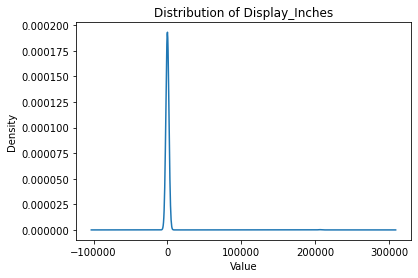

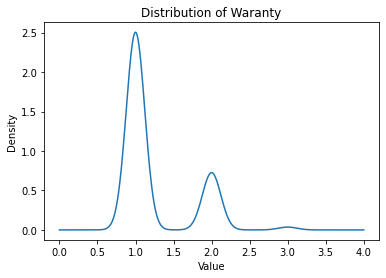

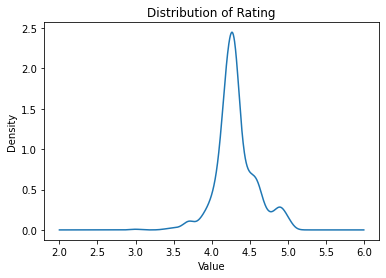

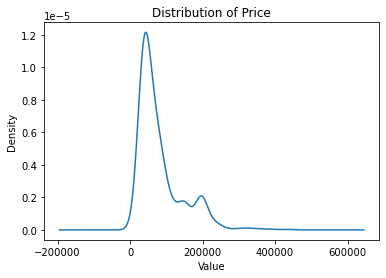

In [17]:
# Function to plot the distribution of a single column
def plot_distribution(df, column):
    df[column].plot(kind="kde")
    plt.title(f"Distribution of {column}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

columns_to_plot = ['Display_Inches', 'Waranty', 'Rating', 'Price']

for column in columns_to_plot:
    plot_distribution(df, column) 

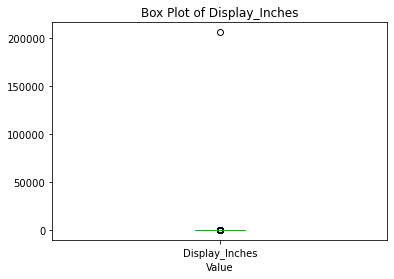

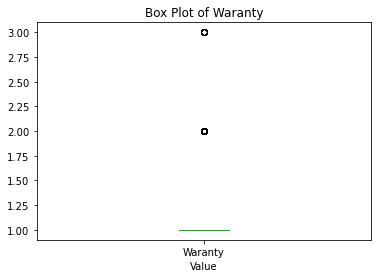

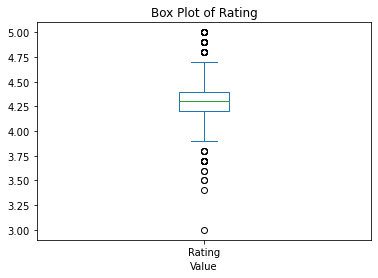

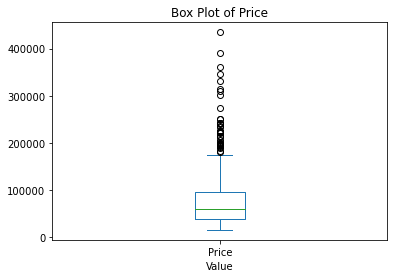

In [18]:
# Function to create box plots for multiple columns
def create_box_plots(df, columns):
    for column in columns:
        df[column].plot(kind="box")
        plt.title(f"Box Plot of {column}")
        plt.xlabel("Value")
        plt.show()

# Columns to create box plots for
columns_to_plot = ['Display_Inches', 'Waranty', 'Rating', 'Price']

# Call the function to create box plots for the specified columns
create_box_plots(df, columns_to_plot) 

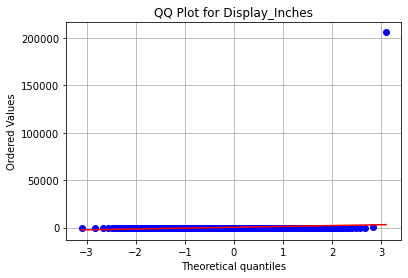

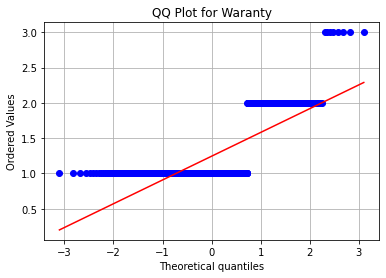

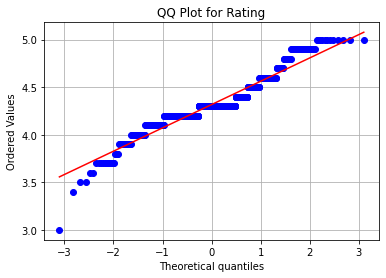

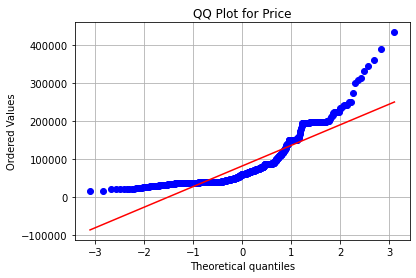

In [19]:
import scipy.stats as stats
# Function to create QQ plots for multiple columns
def create_qq_plots(df, columns):
    for column in columns:
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(f'QQ Plot for {column}')
        plt.grid()
        plt.show()

# Columns to create QQ plots for
columns_to_plot = ['Display_Inches', 'Waranty', 'Rating', 'Price']

# Call the function to create QQ plots for the specified columns
create_qq_plots(df, columns_to_plot) 

In [20]:
# Outliers Treatment in Rating column
# # Define the threshold values for capping
lower_threshold = df["Rating"].quantile(0.10)  # 10th percentile
upper_threshold = df["Rating"].quantile(0.90)  # 90th percentile

# # Cap the outliers below the lower threshold
df["Rating"] = np.where(df["Rating"] < lower_threshold, lower_threshold, df["Rating"])

# # Cap the outliers above the upper threshold
df["Rating"] = np.where(df["Rating"] > upper_threshold, upper_threshold, df["Rating"]) 

<AxesSubplot:>

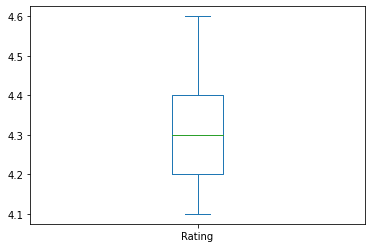

In [21]:
# detecting outliers in Rating column using box column
df["Rating"].plot(kind="box") 

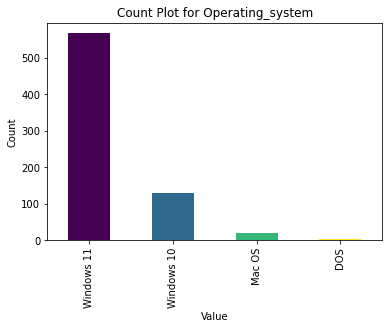

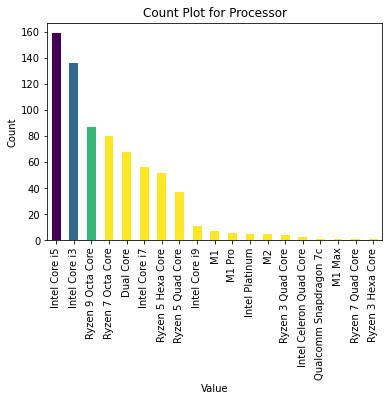

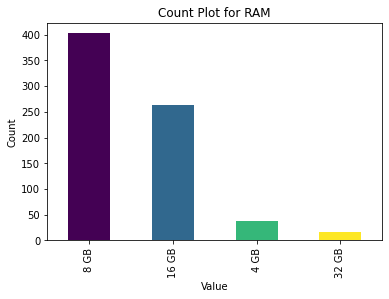

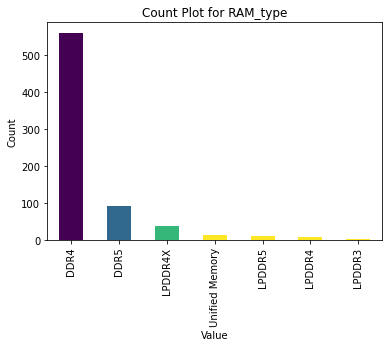

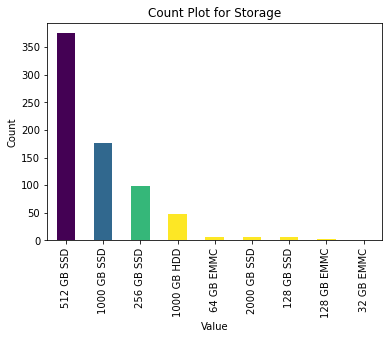

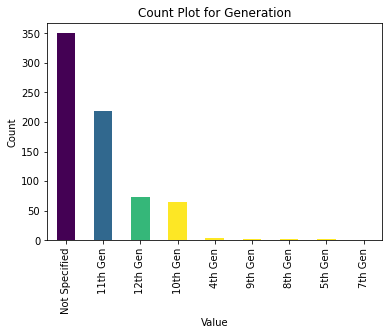

In [28]:
# Function to create count plots with different colors for multiple columns
def create_count_plots_with_colors(df, columns):
    color_map = plt.cm.get_cmap('viridis', len(df[columns[0]].unique()))  # Specify the colormap and the number of unique values
    for column in columns:
        counts = df[column].value_counts()
        counts.plot(kind="bar", color=color_map(range(len(counts))))
        plt.title(f'Count Plot for {column}')
        plt.xlabel("Value")
        plt.ylabel("Count")
        plt.show()

# Columns to create count plots with different colors for
columns_to_plot = ['Operating_system', 'Processor', 'RAM', 'RAM_type', 'Storage', 'Generation']

# Call the function to create count plots with different colors for the specified columns
create_count_plots_with_colors(df, columns_to_plot) 

**Observations:**
- From above plots it is clear that laptops are mostly prefered to have 512 GB SSD and rare systems are having 32 GB EMMC storage.
- Compared to other RAM_types DDR4 is featured in many laptops.
- Mostly systems having 8 GB RAM and 32 GB is less.
- In 720 systems,nearly 155 systems are having Intel core i5,that means customers are prefering such type laptops.
- DOS is very rare OS used only in APPLE branded sytems.

## Relationships Between Input features and Price

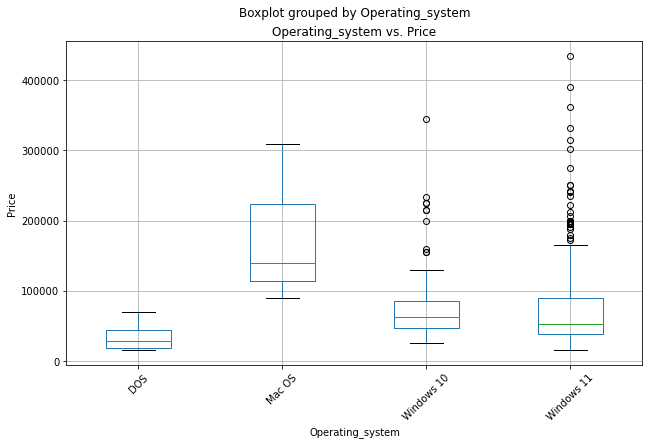

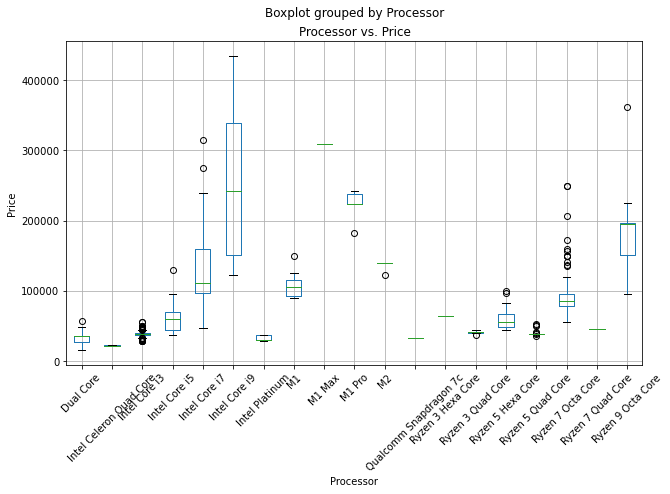

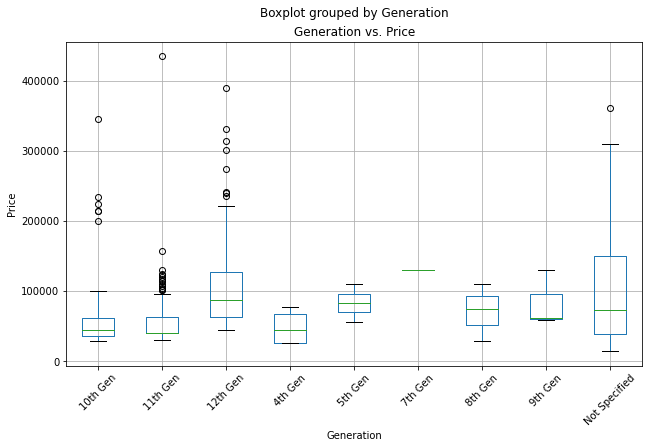

In [29]:
# Function to create box plots for specified columns vs. 'Price'
def create_box_plots(df, x_column, y_column):
    boxplot = df.boxplot(column=y_column, by=x_column, figsize=(10, 6))
    plt.xticks(rotation=45)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs. {y_column}')
    plt.show()

# Call the function for 'Operating_system' vs. 'Price'
create_box_plots(df, 'Operating_system', 'Price')

# Call the function for 'Processor' vs. 'Price'
create_box_plots(df, 'Processor', 'Price')

# Call the function for 'Generation' vs. 'Price'
create_box_plots(df, 'Generation', 'Price') 

<AxesSubplot:xlabel='RAM_type', ylabel='Price'>

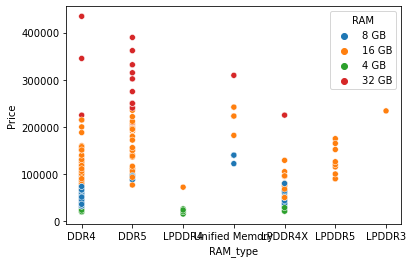

In [31]:
sns.scatterplot(data=df, x="RAM_type", y="Price", hue="RAM") 

<AxesSubplot:xlabel='Price', ylabel='Storage'>

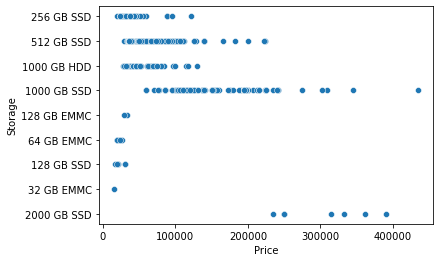

In [32]:
sns.scatterplot(data=df,x="Price", y="Storage")

<AxesSubplot:xlabel='Price', ylabel='Processor'>

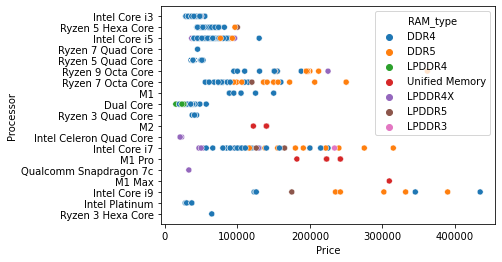

In [33]:
sns.scatterplot(data=df, y="Processor", x="Price", hue="RAM_type") 

### Insights and Recommandations:
`1.Processor:`
- The choice of processor significantly affects the price. High-performance processors from brands like Intel and Ryzen tend to increase the cost of a laptop.

`2.RAM, RAM_type and Storage:`
- Laptops with larger RAM,RAM_type and storage capacities are typically more expensive. However, pricing can be optimized by offering various configurations to cater to different customer needs. 

`3.Display Inches:` 
- Larger and high-resolution displays can contribute to higher prices. Consider offering a range of display options to meet diverse customer preferences.

`4.Brand:` 
- The brand name plays a crucial role in pricing. Well-established brands often command higher prices due to consumer trust and loyalty.

`5.Rating:`
- There is no relationship between Rating and Price.Positive customer reviews and high ratings can justify premium pricing. Encourage satisfied customers to leave reviews and testimonials.

`6.Operating System:`
- The choice of operating system like Windows, macOS, Linux) can influence pricing. Proprietary operating systems like macOS are often associated with premium pricing.
- But there is no direct relationship between Operating system and Price.

`7.Warranty and Ratings:`
- Offering longer warranties and excellent customer support can justify higher prices. Tesla can leverage its customer service expertise to provide exceptional after-sales support.        
- High ratings can justify premium pricing and Encourage satisfied customers to leave their testimonials.

`8.Generation:`
- Regularly updating laptop models with the latest technology and components can maintain competitiveness in the market.

# Price Prediction

## Feature Selection Using Decision Tree

In [34]:
df.head()

,Brand,Operating_system,Processor,Display_Inches,RAM,RAM_type,Storage,Generation,Waranty,Rating,Price
0,Lenovo,Windows 11,Intel Core i3,14.0,8 GB,DDR4,256 GB SSD,11th Gen,2,4.2,36990
1,Lenovo,Windows 11,Intel Core i3,15.6,8 GB,DDR4,512 GB SSD,11th Gen,2,4.2,39990
2,ASUS,Windows 11,Intel Core i3,15.6,8 GB,DDR4,512 GB SSD,10th Gen,1,4.3,32990
3,HP,Windows 10,Ryzen 5 Hexa Core,15.6,8 GB,DDR4,512 GB SSD,Not Specified,1,4.4,49990
4,ASUS,Windows 11,Intel Core i5,15.6,8 GB,DDR4,512 GB SSD,10th Gen,1,4.4,49990


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             720 non-null    object 
 1   Operating_system  720 non-null    object 
 2   Processor         720 non-null    object 
 3   Display_Inches    720 non-null    float64
 4   RAM               720 non-null    object 
 5   RAM_type          720 non-null    object 
 6   Storage           720 non-null    object 
 7   Generation        720 non-null    object 
 8   Waranty           720 non-null    int32  
 9   Rating            720 non-null    float64
 10  Price             720 non-null    int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 56.4+ KB


In [36]:
# Identifying Input and Output Features
y = df['Price']
X = df.drop(columns=['Price'])

In [37]:
# Train data and Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=10)

In [38]:
print(X_train.shape)
print(X_test.shape)

(612, 10)
(108, 10)


### Dividing the Numerical and Categorcial Features

In [39]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,Display_Inches,Rating
142,15.6,4.1
694,16.0,4.6
414,6.0,4.3
525,6.0,4.3
33,15.6,4.4


In [40]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,Brand,Operating_system,Processor,RAM,RAM_type,Storage,Generation
142,DELL,Windows 11,Dual Core,8 GB,DDR4,1000 GB HDD,Not Specified
694,ASUS,Windows 11,Intel Core i7,16 GB,DDR5,1000 GB SSD,12th Gen
414,MSI,Windows 11,Intel Core i7,32 GB,DDR5,1000 GB SSD,12th Gen
525,acer,Windows 11,Intel Core i5,16 GB,DDR4,512 GB SSD,11th Gen
33,acer,Windows 11,Ryzen 5 Hexa Core,8 GB,DDR4,512 GB SSD,Not Specified


In [41]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,Display_Inches,Rating
580,14.0,4.1
444,14.0,4.2
683,6.0,4.3
223,16.0,4.6
489,15.6,4.3


In [42]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,Brand,Operating_system,Processor,RAM,RAM_type,Storage,Generation
580,HP,Windows 11,Dual Core,8 GB,DDR4,1000 GB HDD,Not Specified
444,DELL,Windows 11,Intel Core i5,16 GB,DDR4,512 GB SSD,11th Gen
683,DELL,Windows 11,Intel Core i7,16 GB,DDR5,512 GB SSD,12th Gen
223,ASUS,Windows 11,Intel Core i9,32 GB,DDR5,1000 GB SSD,12th Gen
489,HP,Windows 11,Dual Core,8 GB,DDR4,256 GB SSD,Not Specified


## Feature Selection with RFE

#### Data preparation on train data

In [43]:
# Standardising the Numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# After the scalling column names will be lost 
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                         columns= X_train_num.columns,
                                         index = X_train_num.index)
X_train_num_rescaled.head()

,Display_Inches,Rating
142,-0.040151,-1.311368
694,-0.040103,1.744828
414,-0.041304,-0.088889
525,-0.041304,-0.088889
33,-0.040151,0.522350


In [44]:
# Auto Label-Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train_cat_ALE = pd.DataFrame()

for column in X_train_cat.columns:
    encoded_column = label_encoder.fit_transform(X_train_cat[column])
    X_train_cat_ALE[column] = encoded_column
    X_train_cat_ALE.index = X_train.index
X_train_cat_ALE.head()

,Brand,Operating_system,Processor,RAM,RAM_type,Storage,Generation
142,3,3,0,3,0,0,8
694,2,3,4,0,1,1,2
414,8,3,4,1,1,1,2
525,14,3,3,0,0,7,1
33,14,3,14,3,0,7,8


In [45]:
# Concatinating Numerical and Categorical
X_train_transformed_RFE = pd.concat([X_train_cat_ALE,X_train_num_rescaled],axis = 1)

X_train_transformed_RFE.head()

,Brand,Operating_system,Processor,RAM,RAM_type,Storage,Generation,Display_Inches,Rating
142,3,3,0,3,0,0,8,-0.040151,-1.311368
694,2,3,4,0,1,1,2,-0.040103,1.744828
414,8,3,4,1,1,1,2,-0.041304,-0.088889
525,14,3,3,0,0,7,1,-0.041304,-0.088889
33,14,3,14,3,0,7,8,-0.040151,0.522350


In [46]:
from sklearn.linear_model import LinearRegression

regressor_temp = LinearRegression()

In [47]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, n_features_to_select=7)

rfe = rfe.fit(X_train_transformed_RFE, y_train)

In [48]:
temp_df = pd.DataFrame({'Columns' : X_train_transformed_RFE.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,Brand,False,2
1,Operating_system,True,1
2,Processor,True,1
3,RAM,True,1
4,RAM_type,True,1
5,Storage,True,1
6,Generation,True,1
7,Display_Inches,True,1
8,Rating,False,3


In [49]:
imp_col = X_train_transformed_RFE.columns[rfe.support_]

imp_col

Index(['Operating_system', 'Processor', 'RAM', 'RAM_type', 'Storage',
       'Generation', 'Display_Inches'],
      dtype='object')

In [50]:
X_train_rfe = X_train[imp_col]

X_train_rfe.head()

,Operating_system,Processor,RAM,RAM_type,Storage,Generation,Display_Inches
142,Windows 11,Dual Core,8 GB,DDR4,1000 GB HDD,Not Specified,15.6
694,Windows 11,Intel Core i7,16 GB,DDR5,1000 GB SSD,12th Gen,16.0
414,Windows 11,Intel Core i7,32 GB,DDR5,1000 GB SSD,12th Gen,6.0
525,Windows 11,Intel Core i5,16 GB,DDR4,512 GB SSD,11th Gen,6.0
33,Windows 11,Ryzen 5 Hexa Core,8 GB,DDR4,512 GB SSD,Not Specified,15.6


## Feature Selection with DT

In [51]:
from sklearn.tree import DecisionTreeRegressor
reg_DT_temp = DecisionTreeRegressor(max_depth=5)
reg_DT_temp.fit(X_train_transformed_RFE, y_train)

DecisionTreeRegressor(max_depth=5)

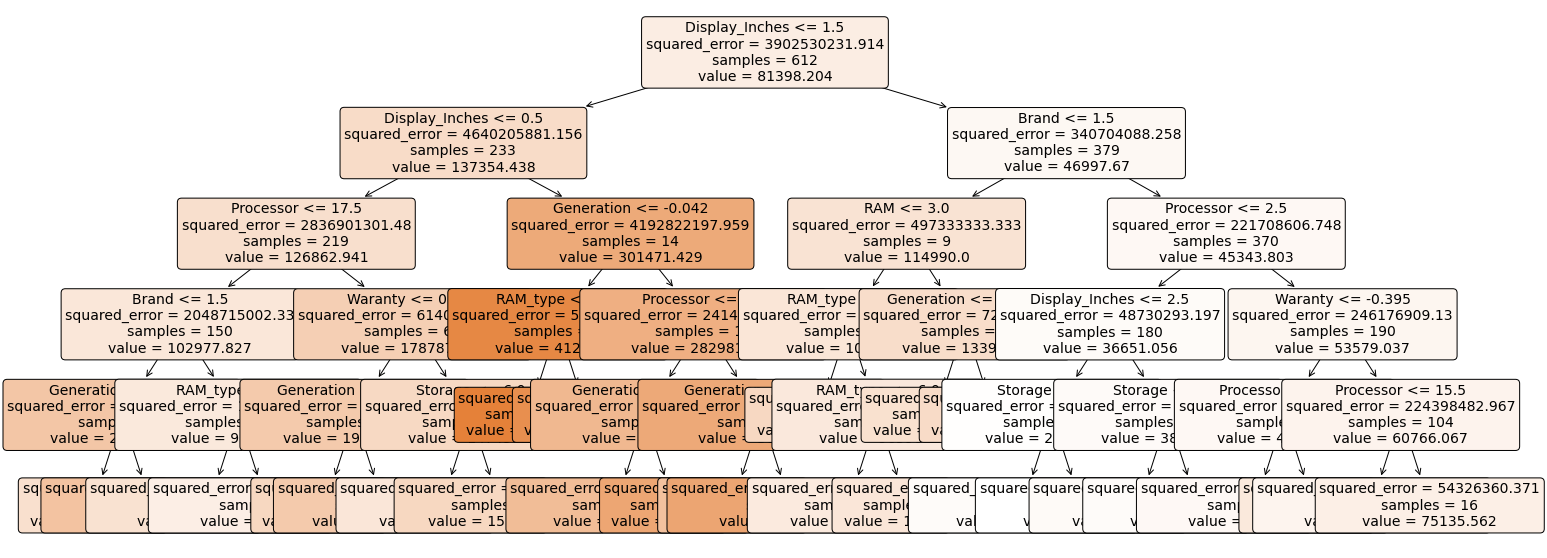

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))

# Assuming "regressor" is your trained regression decision tree model
plot_tree(reg_DT_temp, feature_names=X_train.columns, filled=True, rounded=True, fontsize=14)

plt.show()

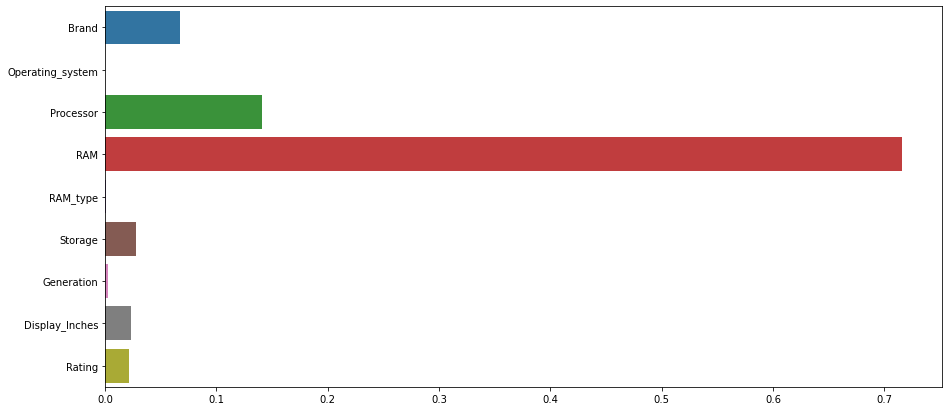

In [53]:
plt.figure(figsize=(15,7))

sns.barplot(x = reg_DT_temp.feature_importances_, y = X_train_transformed_RFE.columns)

plt.show()

In [54]:
feature_importances = reg_DT_temp.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_transformed_RFE.columns, 'Importance': feature_importances})

selected_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature'].tolist()
selected_features

['Brand',
 'Processor',
 'RAM',
 'RAM_type',
 'Storage',
 'Generation',
 'Display_Inches',
 'Rating']

In [55]:
df = df[['Brand','Processor','RAM','RAM_type','Storage','Generation','Display_Inches','Rating']]

In [56]:
df_train = X_train[['Brand','Processor','RAM','RAM_type','Storage','Rating']]
df_train.head()

,Brand,Processor,RAM,RAM_type,Storage,Rating
142,DELL,Dual Core,8 GB,DDR4,1000 GB HDD,4.1
694,ASUS,Intel Core i7,16 GB,DDR5,1000 GB SSD,4.6
414,MSI,Intel Core i7,32 GB,DDR5,1000 GB SSD,4.3
525,acer,Intel Core i5,16 GB,DDR4,512 GB SSD,4.3
33,acer,Ryzen 5 Hexa Core,8 GB,DDR4,512 GB SSD,4.4


In [57]:
df_test = X_test[['Brand','Processor','RAM','RAM_type','Storage','Rating']]
df_test.head()

,Brand,Processor,RAM,RAM_type,Storage,Rating
580,HP,Dual Core,8 GB,DDR4,1000 GB HDD,4.1
444,DELL,Intel Core i5,16 GB,DDR4,512 GB SSD,4.2
683,DELL,Intel Core i7,16 GB,DDR5,512 GB SSD,4.3
223,ASUS,Intel Core i9,32 GB,DDR5,1000 GB SSD,4.6
489,HP,Dual Core,8 GB,DDR4,256 GB SSD,4.3


In [58]:
df['Rating'].unique()

array([4.2, 4.3, 4.4, 4.1, 4.6, 4.5])

In [59]:
df_train_num = df_train.select_dtypes(include=['int64','float64'])
df_train_num.head()

,Rating
142,4.1
694,4.6
414,4.3
525,4.3
33,4.4


In [60]:
df_train_cat = df_train.select_dtypes(include=['object'])
df_train_cat.head()

,Brand,Processor,RAM,RAM_type,Storage
142,DELL,Dual Core,8 GB,DDR4,1000 GB HDD
694,ASUS,Intel Core i7,16 GB,DDR5,1000 GB SSD
414,MSI,Intel Core i7,32 GB,DDR5,1000 GB SSD
525,acer,Intel Core i5,16 GB,DDR4,512 GB SSD
33,acer,Ryzen 5 Hexa Core,8 GB,DDR4,512 GB SSD


In [61]:
# Ordinal
df_train_cat_Ord = df_train_cat[['Processor','RAM','RAM_type','Storage']]  
df_train_cat_Ord.head()

,Processor,RAM,RAM_type,Storage
142,Dual Core,8 GB,DDR4,1000 GB HDD
694,Intel Core i7,16 GB,DDR5,1000 GB SSD
414,Intel Core i7,32 GB,DDR5,1000 GB SSD
525,Intel Core i5,16 GB,DDR4,512 GB SSD
33,Ryzen 5 Hexa Core,8 GB,DDR4,512 GB SSD


In [62]:
# Standardising the Numerical columns
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_train_num_rescaled = pd.DataFrame(std_scaler.fit_transform(df_train_num),
                                         columns= df_train_num.columns,
                                         index = df_train_num.index)
df_train_num_rescaled.head()

,Rating
142,-1.311368
694,1.744828
414,-0.088889
525,-0.088889
33,0.522350


In [63]:
# Label Encoding Ordinal(categorical) feature
df_train_cat_LabelEnc = pd.DataFrame(index=df_train_cat_Ord.index)

df_train_cat_LabelEnc.head()

""
142
694
414
525
33


In [64]:
processor_encoder = {'Dual Core':1,
                     'Intel Celeron Quad Core':2,
                     'Intel Platinum':3,
                     'Intel Core i3':4,
                     'Intel Core i5':5,
                     'Intel Core i7':6,
                     'Intel Core i9':7,
                     'Ryzen 3 Quad Core':8,
                     'Ryzen 5 Quad Core':9,
                     'Ryzen 7 Quad Core':10,
                     'Ryzen 3 Hexa Core':11,
                     'Ryzen 5 Hexa Core':12,
                     'Ryzen 7 Octa Core':13,
                     'Ryzen 9 Octa Core':14,
                     'Qualcomm Snapdragon 7c':15,
                     'M1':16,
                     'M2':17,
                     'M1 Pro':18,
                     'M1 Max':19}

df_train_cat_LabelEnc['Processor'] = df_train_cat['Processor'].apply(lambda x : processor_encoder[x])

df_train_cat_LabelEnc.head()

,Processor
142,1
694,6
414,6
525,5
33,12


In [65]:
ram_encoder = {'4 GB' : 1, '8 GB' : 2, '16 GB' : 3, '32 GB':4}

df_train_cat_LabelEnc['RAM'] = df_train_cat['RAM'].apply(lambda x : ram_encoder[x])

df_train_cat_LabelEnc.head()

,Processor,RAM
142,1,2
694,6,3
414,6,4
525,5,3
33,12,2


In [66]:
ram_type_encoder = {'Unified Memory' : 1, 'DDR4' : 2, 'DDR5' : 3, 'LPDDR3':4, 'LPDDR4':5, 'LPDDR4X':6,'LPDDR5':7}

df_train_cat_LabelEnc['RAM_type'] = df_train_cat['RAM_type'].apply(lambda x : ram_type_encoder[x])

df_train_cat_LabelEnc.head()

,Processor,RAM,RAM_type
142,1,2,2
694,6,3,3
414,6,4,3
525,5,3,2
33,12,2,2


In [67]:
storage_encoder = {'1000 GB HDD': 0,'128 GB SSD' : 1, '256 GB SSD' : 2, '512 GB SSD' : 3, '1000 GB SSD':4, '2000 GB SSD':5,'32 GB EMMC':6, '64 GB EMMC':7,'128 GB EMMC':8}

df_train_cat_LabelEnc['Storage'] = df_train_cat['Storage'].apply(lambda x : storage_encoder[x])

df_train_cat_LabelEnc.head()

,Processor,RAM,RAM_type,Storage
142,1,2,2,0
694,6,3,3,4
414,6,4,3,4
525,5,3,2,3
33,12,2,2,3


In [68]:
# Nominal
df_train_cat_Nom = X_train_cat[['Brand']]

df_train_cat_Nom.head()

,Brand
142,DELL
694,ASUS
414,MSI
525,acer
33,acer


In [69]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

df_train_cat_OneEnc = pd.DataFrame(encoder.fit_transform(df_train_cat_Nom), 
                               columns=encoder.get_feature_names_out(df_train_cat_Nom.columns), 
                               index = df_train_cat_Nom.index)

df_train_cat_OneEnc.head()

,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme
142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
df_train_rescaled = pd.concat([df_train_num_rescaled,df_train_cat_LabelEnc,df_train_cat_OneEnc],axis = 1)

df_train_rescaled.head()

,Rating,Processor,RAM,RAM_type,Storage,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme
142,-1.311368,1,2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694,1.744828,6,3,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,-0.088889,6,4,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,-0.088889,5,3,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,0.522350,12,2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Data preparation on test data

In [71]:
df_test.head()

,Brand,Processor,RAM,RAM_type,Storage,Rating
580,HP,Dual Core,8 GB,DDR4,1000 GB HDD,4.1
444,DELL,Intel Core i5,16 GB,DDR4,512 GB SSD,4.2
683,DELL,Intel Core i7,16 GB,DDR5,512 GB SSD,4.3
223,ASUS,Intel Core i9,32 GB,DDR5,1000 GB SSD,4.6
489,HP,Dual Core,8 GB,DDR4,256 GB SSD,4.3


In [72]:
df_test_num = df_test[['Rating']]
df_test_num.head()

,Rating
580,4.1
444,4.2
683,4.3
223,4.6
489,4.3


In [73]:
df_test_cat = X_test_cat[['Brand','Processor','RAM','RAM_type','Storage']]
df_test_cat.head()

,Brand,Processor,RAM,RAM_type,Storage
580,HP,Dual Core,8 GB,DDR4,1000 GB HDD
444,DELL,Intel Core i5,16 GB,DDR4,512 GB SSD
683,DELL,Intel Core i7,16 GB,DDR5,512 GB SSD
223,ASUS,Intel Core i9,32 GB,DDR5,1000 GB SSD
489,HP,Dual Core,8 GB,DDR4,256 GB SSD


In [74]:
# Ordinal
df_test_cat_Ord = df_test_cat[['Processor','RAM','RAM_type','Storage']]  
df_test_cat_Ord.head()

,Processor,RAM,RAM_type,Storage
580,Dual Core,8 GB,DDR4,1000 GB HDD
444,Intel Core i5,16 GB,DDR4,512 GB SSD
683,Intel Core i7,16 GB,DDR5,512 GB SSD
223,Intel Core i9,32 GB,DDR5,1000 GB SSD
489,Dual Core,8 GB,DDR4,256 GB SSD


In [75]:
# Ordinal
df_test_cat_Nom = df_test_cat[['Brand']]  
df_test_cat_Nom.head()

,Brand
580,HP
444,DELL
683,DELL
223,ASUS
489,HP


In [76]:
# Standardising the Numerical columns
df_test_num_rescaled = pd.DataFrame(std_scaler.transform(df_test_num),
                                         columns= df_test_num.columns,
                                         index = df_test_num.index)
df_test_num_rescaled.head()

,Rating
580,-1.311368
444,-0.700129
683,-0.088889
223,1.744828
489,-0.088889


In [77]:
# Label Encoding Ordinal(categorical) feature
df_test_cat_LabelEnc = pd.DataFrame(index=df_test_cat_Ord.index)

df_test_cat_LabelEnc.head()

""
580
444
683
223
489


In [78]:
# Label Encoding for Ordinal feature
df_test_cat_LabelEnc['Processor'] = df_test_cat_Ord['Processor'].apply(lambda x : processor_encoder[x])
df_test_cat_LabelEnc['RAM'] = df_test_cat_Ord['RAM'].apply(lambda x : ram_encoder[x])
df_test_cat_LabelEnc['RAM_type'] = df_test_cat_Ord['RAM_type'].apply(lambda x : ram_type_encoder[x])
df_test_cat_LabelEnc['Storage'] = df_test_cat_Ord['Storage'].apply(lambda x : storage_encoder[x])

df_test_cat_LabelEnc.head()

,Processor,RAM,RAM_type,Storage
580,1,2,2,0
444,5,3,2,3
683,6,3,3,3
223,7,4,3,4
489,1,2,2,2


In [79]:
# OneHotEncoding the (Nominal)categorical features

# Creating dataframe as columns will be in array format after OneHot Encoding
df_test_cat_OneEnc = pd.DataFrame(encoder.transform(df_test_cat_Nom), 
                               columns=encoder.get_feature_names_out(df_test_cat_Nom.columns), 
                               index = df_test_cat_Nom.index)

df_test_cat_OneEnc.head()

,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme
580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df_test_rescaled = pd.concat([df_test_num_rescaled,df_test_cat_LabelEnc,df_test_cat_OneEnc],axis = 1)

df_test_rescaled.head()

,Rating,Processor,RAM,RAM_type,Storage,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme
580,-1.311368,1,2,2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,-0.700129,5,3,2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,-0.088889,6,3,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,1.744828,7,4,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,-0.088889,1,2,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building and Predictions

In [81]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(df_train_rescaled, y_train)

LinearRegression()

#### Prediction on Train data

In [82]:
# Prediction on Train data
LR_y_train_predicted = LR_model.predict(df_train_rescaled)

LR_TRAIN_temp_df = pd.DataFrame({'Train_Actual': y_train, 'Train_Predicted': LR_y_train_predicted})
LR_TRAIN_temp_df.head()

,Train_Actual,Train_Predicted
142,33099,37258.395572
694,179990,119599.733972
414,274990,197625.100453
525,62990,106964.039240
33,47990,69041.710334


#### Residual Analysis on Training Data

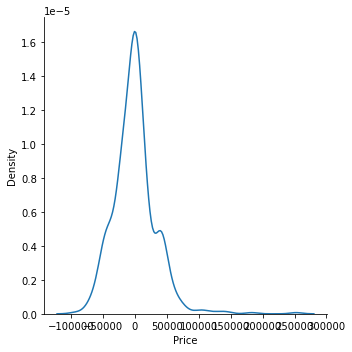

In [83]:
residual = y_train - LR_y_train_predicted

sns.displot(residual, kind='kde')

#### Train-score

In [84]:
# Train-score
from sklearn import metrics

print('LR_TRAIN Mean Absolute Error: ', metrics.mean_absolute_error(y_train, LR_y_train_predicted))

print('LR_TRAIN Mean Squared Error: ', metrics.mean_squared_error(y_train, LR_y_train_predicted))

print('LR_TRAIN Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, LR_y_train_predicted)))

print('LR_TRAIN R2: ',metrics.r2_score(y_train, LR_y_train_predicted))

r2 = metrics.r2_score(y_train, LR_y_train_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('LR_TRAIN Adj R2: ',r2_adj)

LR_TRAIN Mean Absolute Error:  23034.613417280845
LR_TRAIN Mean Squared Error:  1116874068.4041684
LR_TRAIN Root Mean Squared Error:  33419.66589306614
LR_TRAIN R2:  0.7138077088370565
LR_TRAIN Adj R2:  0.684303348923351


#### Prediction on Test data

In [85]:
LR_y_test_predicted = LR_model.predict(df_test_rescaled)

LR_TEST_temp_df = pd.DataFrame({'Test_Actual': y_test, 'Test_Predicted': LR_y_test_predicted})

LR_TEST_temp_df.head()

,Test_Actual,Test_Predicted
580,28999,16094.577177
444,75990,119236.744255
683,221774,123996.256649
223,241990,177231.446370
489,38999,21228.709706


#### Test-score

In [86]:
# Test-score
from sklearn import metrics

print('LR_TEST Mean Absolute Error: ', metrics.mean_absolute_error(y_test, LR_y_test_predicted))

print('LR_TEST Mean Squared Error: ', metrics.mean_squared_error(y_test, LR_y_test_predicted))

print('LR_TEST Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, LR_y_test_predicted)))

print('LR_TEST R2: ',metrics.r2_score(y_test, LR_y_test_predicted))

r2 = metrics.r2_score(y_test, LR_y_test_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('LR_TEST Adj R2: ',r2_adj)

LR_TEST Mean Absolute Error:  25560.300399404794
LR_TEST Mean Squared Error:  1069415351.7010036
LR_TEST Root Mean Squared Error:  32701.91663650624
LR_TEST R2:  0.6558481712532942
LR_TEST Adj R2:  0.620368601279407


### KNN

In [87]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor()
KNN_model.fit(df_train_rescaled, y_train)

KNeighborsRegressor()

In [88]:
# Prediction on Train data
KNN_y_train_predicted = KNN_model.predict(df_train_rescaled)

KNN_TRAIN_temp_df = pd.DataFrame({'Train_Actual': y_train, 'Train_Predicted': KNN_y_train_predicted})
KNN_TRAIN_temp_df.head()

,Train_Actual,Train_Predicted
142,33099,33709.8
694,179990,158890.0
414,274990,239172.0
525,62990,56990.0
33,47990,56852.0


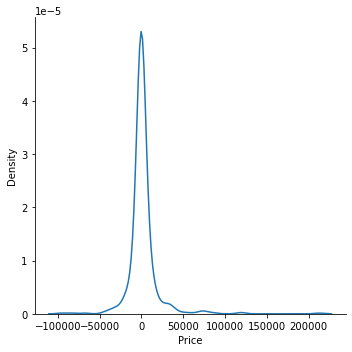

In [89]:
# Residual analysis on train data
residual = y_train - KNN_y_train_predicted

sns.displot(residual, kind='kde')

In [90]:
# Train-score
print('KNN_TRAIN Mean Absolute Error: ', metrics.mean_absolute_error(y_train, KNN_y_train_predicted))

print('KNN_TRAIN Mean Squared Error: ', metrics.mean_squared_error(y_train, KNN_y_train_predicted))

print('KNN_TRAIN Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, KNN_y_train_predicted)))

print('KNN_TRAIN R2: ',metrics.r2_score(y_train, KNN_y_train_predicted))

r2 = metrics.r2_score(y_train, KNN_y_train_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('KNN_TRAIN Adj R2: ',r2_adj)

KNN_TRAIN Mean Absolute Error:  7667.5009803921575
KNN_TRAIN Mean Squared Error:  329217481.2412419
KNN_TRAIN Root Mean Squared Error:  18144.35122128212
KNN_TRAIN R2:  0.9156399920879632
KNN_TRAIN Adj R2:  0.9069430840557945


In [91]:
KNN_y_test_predicted = KNN_model.predict(df_test_rescaled)

KNN_TEST_temp_df = pd.DataFrame({'Test_Actual': y_test, 'Test_Predicted': KNN_y_test_predicted})

KNN_TEST_temp_df.head()

,Test_Actual,Test_Predicted
580,28999,32509.8
444,75990,77908.6
683,221774,121293.6
223,241990,230470.0
489,38999,31570.0


In [92]:
# Test-score
from sklearn import metrics

print('KNN_TEST Mean Absolute Error: ', metrics.mean_absolute_error(y_test, KNN_y_test_predicted))

print('KNN_TEST Mean Squared Error: ', metrics.mean_squared_error(y_test, KNN_y_test_predicted))

print('KNN_TEST Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, KNN_y_test_predicted)))

print('KNN_TEST R2: ',metrics.r2_score(y_test, KNN_y_test_predicted))

r2 = metrics.r2_score(y_test, KNN_y_test_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('KNN_TEST Adj R2: ',r2_adj)

KNN_TEST Mean Absolute Error:  8684.198148148147
KNN_TEST Mean Squared Error:  302326650.42925924
KNN_TEST Root Mean Squared Error:  17387.542966999656
KNN_TEST R2:  0.902707334939039
KNN_TEST Adj R2:  0.8926771632832698


### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=3)
DT_model.fit(df_train_rescaled, y_train)

DecisionTreeRegressor(max_depth=3)

In [94]:
# Prediction on Train data
DT_y_train_predicted = DT_model.predict(df_train_rescaled)

DT_TRAIN_temp_df = pd.DataFrame({'Train_Actual': y_train, 'Train_Predicted': DT_y_train_predicted})
DT_TRAIN_temp_df.head()

,Train_Actual,Train_Predicted
142,33099,44083.445428
694,179990,107428.273973
414,274990,291213.076923
525,62990,81038.000000
33,47990,44083.445428


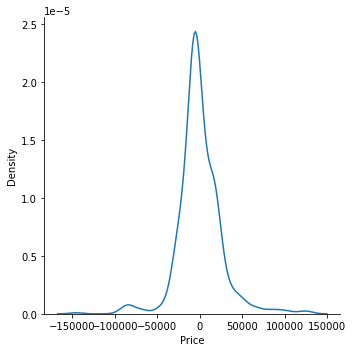

In [95]:
# Residual analysis on train data
residual = y_train - DT_y_train_predicted

sns.displot(residual, kind='kde')

In [96]:
# Train-score
print('DT_TRAIN Mean Absolute Error: ', metrics.mean_absolute_error(y_train, DT_y_train_predicted))

print('DT_TRAIN Mean Squared Error: ', metrics.mean_squared_error(y_train, DT_y_train_predicted))

print('DT_TRAIN Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, DT_y_train_predicted)))

print('DT_TRAIN R2: ',metrics.r2_score(y_train, DT_y_train_predicted))

r2 = metrics.r2_score(y_train, DT_y_train_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('DT_TRAIN Adj R2: ',r2_adj)

DT_TRAIN Mean Absolute Error:  17233.748210466103
DT_TRAIN Mean Squared Error:  686061679.819758
DT_TRAIN Root Mean Squared Error:  26192.77915418213
DT_TRAIN R2:  0.8242008033123553
DT_TRAIN Adj R2:  0.8060771747878559


In [97]:
DT_y_test_predicted = DT_model.predict(df_test_rescaled)

DT_TEST_temp_df = pd.DataFrame({'Test_Actual': y_test, 'Test_Predicted': DT_y_test_predicted})

DT_TEST_temp_df.head()

,Test_Actual,Test_Predicted
580,28999,44083.445428
444,75990,81038.000000
683,221774,81038.000000
223,241990,291213.076923
489,38999,44083.445428


In [98]:
# Test-score
from sklearn import metrics

print('DT_TEST Mean Absolute Error: ', metrics.mean_absolute_error(y_test, DT_y_test_predicted))

print('DT_TEST Mean Squared Error: ', metrics.mean_squared_error(y_test, DT_y_test_predicted))

print('DT_TEST Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, DT_y_test_predicted)))

print('DT_TEST R2: ',metrics.r2_score(y_test, DT_y_test_predicted))

r2 = metrics.r2_score(y_test, DT_y_test_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('DT_TEST Adj R2: ',r2_adj)

DT_TEST Mean Absolute Error:  17653.276372734745
DT_TEST Mean Squared Error:  681494389.5361749
DT_TEST Root Mean Squared Error:  26105.447506912707
DT_TEST R2:  0.7806862038529362
DT_TEST Adj R2:  0.7580765341470533


### Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(df_train_rescaled, y_train)

RandomForestRegressor()

In [100]:
# Prediction on Train data
RF_y_train_predicted = RF_model.predict(df_train_rescaled)

RF_TRAIN_temp_df = pd.DataFrame({'Train_Actual': y_train, 'Train_Predicted': RF_y_train_predicted})
RF_TRAIN_temp_df.head()

,Train_Actual,Train_Predicted
142,33099,36372.212333
694,179990,151295.000000
414,274990,270844.000000
525,62990,63910.270357
33,47990,52590.494524


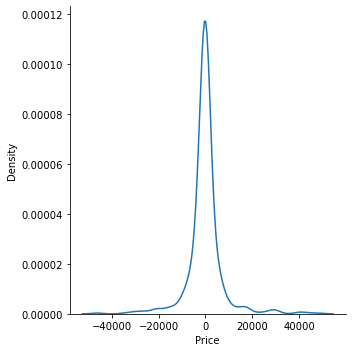

In [101]:
# Residual analysis on train data
residual = y_train - RF_y_train_predicted

sns.displot(residual, kind='kde')

In [102]:
# Train-score
print('RF_TRAIN Mean Absolute Error: ', metrics.mean_absolute_error(y_train, RF_y_train_predicted))

print('RF_TRAIN Mean Squared Error: ', metrics.mean_squared_error(y_train, RF_y_train_predicted))

print('RF_TRAIN Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, RF_y_train_predicted)))

print('RF_TRAIN R2: ',metrics.r2_score(y_train, RF_y_train_predicted))

r2 = metrics.r2_score(y_train, RF_y_train_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('RF_TRAIN Adj R2: ',r2_adj)

RF_TRAIN Mean Absolute Error:  3734.0562860229543
RF_TRAIN Mean Squared Error:  58927503.81774416
RF_TRAIN Root Mean Squared Error:  7676.425197821194
RF_TRAIN R2:  0.9849001800586076
RF_TRAIN Adj R2:  0.9833434975904228


In [103]:
RF_y_test_predicted = RF_model.predict(df_test_rescaled)

RF_TEST_temp_df = pd.DataFrame({'Test_Actual': y_test, 'Test_Predicted': RF_y_test_predicted})

RF_TEST_temp_df.head()

,Test_Actual,Test_Predicted
580,28999,30818.180000
444,75990,67440.083333
683,221774,103135.230000
223,241990,300598.000000
489,38999,31219.600000


In [104]:
# Test-score
from sklearn import metrics

print('RF_TEST Mean Absolute Error: ', metrics.mean_absolute_error(y_test, RF_y_test_predicted))

print('RF_TEST Mean Squared Error: ', metrics.mean_squared_error(y_test, RF_y_test_predicted))

print('RF_TEST Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, RF_y_test_predicted)))

print('RF_TEST R2: ',metrics.r2_score(y_test, RF_y_test_predicted))

r2 = metrics.r2_score(y_test, RF_y_test_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('RF_TEST Adj R2: ',r2_adj)

RF_TEST Mean Absolute Error:  7921.60222005463
RF_TEST Mean Squared Error:  331350065.8516354
RF_TEST Root Mean Squared Error:  18203.023535985318
RF_TEST R2:  0.8933672207559028
RF_TEST Adj R2:  0.8823741507307381


## Conclusions

#### 1.Model Performance:
`Random Forest: `                  
- (RF) outperforms all other models in terms of both training and test scores. 
- It has the highest training score (98%) and a relatively high test score (88%), indicating strong predictive capabilities.

`K-Nearest Neighbors: `                             
- (KNN) also performs well, with high training (90%) and test (89%) scores. It demonstrates consistent performance on both the training and test datasets.   

`Decision Tree: ` 
- (DT) shows a moderate level of performance, with a training score of 80% and a test score of 75%. - - While it performs reasonably well on the training data, there is some overfitting as evidenced by the performance drop on the test data.

`Linear Regression: `
- An okay fit to the training data (68%), shows a lower test score (62%).
- linear model may not capture the underlying patterns in the data as effectively as the other models.

#### Overfitting:
- Overfitting is observed in the Decision Tree.
- This is indicated by the difference between their training and test scores.
- A larger gap between these scores suggests overfitting, where the model fits the training data too closely, making it less generalizable to unseen data.

#### Model Selection:
- Random Forest and K-Nearest Neighbors appear to be best Models for laptop price prediction due to their high test scores and reasonable training scores. 
- The choice between these two models might depend on other factors like computational resources and interpretability.

#### Further Improvement:
- Linear Regression and Decision Tree models can improve in prediction by doing Feature engineering, feature selection, or hyperparameter tuning could potentially enhance their performance.

### Exporting the models

In [106]:
import pickle
pickle.dump(LR_model,open("LR_model.sav",'wb'))
pickle.dump(KNN_model,open("KNN_model.sav",'wb'))
pickle.dump(DT_model,open("DT_model.sav",'wb'))
pickle.dump(RF_model,open("RF_model.sav",'wb'))
pickle.dump(std_scaler,open("std_scaler.sav",'wb'))
pickle.dump(encoder,open("encoder.sav",'wb'))

## CROSS-VALIDATON (Hyperparameter tuning)

### GridSearchCV(KNN)

In [110]:
# Importing libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [111]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]


grid_knn = GridSearchCV(
    estimator=KNN_model,
    param_grid=tuned_parameters, 
    scoring='neg_mean_squared_error',  # Use an appropriate regression metric
    cv=5,
    return_train_score=True,
    verbose=1
)

grid_knn.fit(df_train_rescaled, y_train)

y_pred = grid_knn.predict(df_test_rescaled)

r2 = metrics.r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_knn.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_knn.best_score_))

n = len(y_test)
k = X_test.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print('KNN_Random Adj R2:', r2_adj)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Hyperparameters: {'n_neighbors': 2, 'p': 3}
Best RMSE Score: 21682.271406561573
KNN_Random Adj R2: 0.8596604984799271


### RandomizedSearchCV (KNN)

In [112]:
tuned_parameters = {
    'n_neighbors': list(range(1, 51)),
    'p': [1, 2, 3]
}

random_knn = RandomizedSearchCV(
    estimator= KNN_model,
    param_distributions=tuned_parameters,
    scoring='neg_mean_squared_error',  # Use an appropriate regression metric
    cv=5,
    return_train_score=True,
    verbose=1,
    n_iter=10  # You can adjust the number of iterations as needed
)

# Fit the RandomizedSearchCV to your training data
random_knn.fit(df_train_rescaled, y_train)

y_pred = random_knn.predict(df_test_rescaled)

r2 = metrics.r2_score(y_test, y_pred)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", random_knn.best_params_)
print("Best RMSE Score:", np.sqrt(-random_knn.best_score_))

# Calculate adjusted R-squared on the test data (assuming you have already trained a KNN model on X_train)
n = len(y_test)
k = X_test.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print('KNN_Random Adj R2:', r2_adj)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'p': 1, 'n_neighbors': 4}
Best RMSE Score: 22883.36688734259
KNN_Random Adj R2: 0.9150287307480588


### GridSearchCV (Decision Tree)

In [113]:
tuned_parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6]
}


grid_dt = GridSearchCV(
    estimator=DT_model,
    param_grid=tuned_parameters,
    scoring='neg_mean_squared_error',  # Use an appropriate regression metric
    cv=5,
    return_train_score=True,
    verbose=1
)

# Fit the GridSearchCV to your training data
grid_dt.fit(df_train_rescaled, y_train)

y_pred = grid_dt.predict(df_test_rescaled)

r2 = metrics.r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_dt.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_dt.best_score_))
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('DT_Grid Adj R2:', r2_adj)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'max_depth': 5}
Best RMSE Score: 21134.169388126433
DT_Grid Adj R2: 0.843910396020505


### RandomizedSearchCV (Decision Tree)

In [114]:
tuned_parameters = {
    'max_depth': [1,2,3,4,5,6] # By default n_iter = 10
}

random_reg = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=tuned_parameters,
    scoring='neg_mean_squared_error',
    cv=5,
    return_train_score=True,
    verbose=1
)

# Fit the RandomSearchCV to your data (X_train and y_train are your training data)
random_reg.fit(df_train_rescaled, y_train)

y_pred = random_reg.predict(df_test_rescaled)

r2 = metrics.r2_score(y_test, y_pred)

print("Best Hyperparameters:", random_reg.best_params_)
print("Best RMSE Score:", np.sqrt(-random_reg.best_score_))

n = len(y_test)
k = X_test.shape[1]
r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('DT_Random Adj R2: ',r2_adj)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\NAVYA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'max_depth': 5}
Best RMSE Score: 20909.775423812007
DT_Random Adj R2:  0.843910396020505
